In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

## Sample
Megan Bedell made an awesome cross-match available, which was online by the time I woke up on West Coast!

Let's match this to the McQuillan+2014 rotation catalog using Pandas & a join

In [87]:
Gfile = '../data/kepler_dr2_1arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')

In [88]:
gaia = data.to_pandas()
gaia.shape

(195830, 101)

In [89]:
gaia.columns.values

array(['designation', 'source_id', 'gaia_ref_epoch', 'ra', 'ra_error',
       'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_mag', 'bp_rp', 'bp_g', 'g_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'l', 'b', 'ecl_lon',
       'ecl_lat', 'teff_val', 'teff_percentile_lower',
       'teff_percentile_upper', 'a_g_v

Text(0,0.5,'Bailer-Jones distance (pc)')

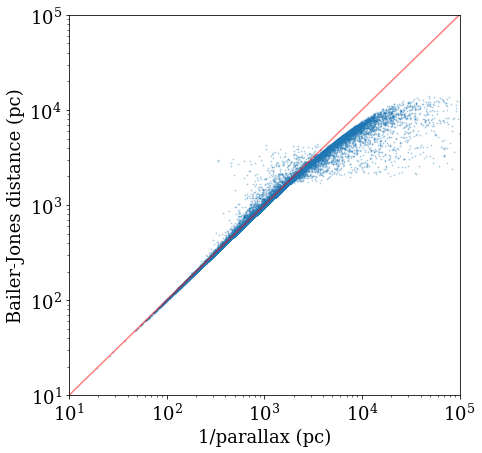

In [90]:
plt.figure(figsize=(7,7))

pok = np.where((gaia[u'r_modality_flag'] ==1) & (gaia[u'r_result_flag'] ==1))
plt.scatter(1000./gaia[u'parallax'].values[pok], gaia['r_est'].values[pok], s=1, alpha=0.25)

plt.plot([1,1e5], [1,1e5], c='r', alpha=0.5)
plt.xlim(10,1e5)
plt.ylim(10,1e5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('1/parallax (pc)')
plt.ylabel('Bailer-Jones distance (pc)')

In [91]:
rot_file = '../data/Table_Periodic.txt'
rot = pd.read_csv(rot_file)
rot.shape

(34030, 11)

In [92]:
df = pd.merge(rot, gaia, right_on='kepid', left_on='KID')
df.shape

(33538, 112)

In [93]:
df.columns.values

array(['KID', 'Teff', 'logg_x', 'Mass', 'Prot', 'Prot_err', 'Rper', 'LPH',
       'w', 'DC', 'Flag', 'designation', 'source_id', 'gaia_ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_primary_flag',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_mag', 'bp_rp', 'bp_g', 'g_rp', 'radial_velocity',
       'radial_velocity_error', 'phot_variable_flag', 'l', 'b', 'ecl_lon',

## Quality Cuts
we need to trim the sample to get the best distances

(0, 1)

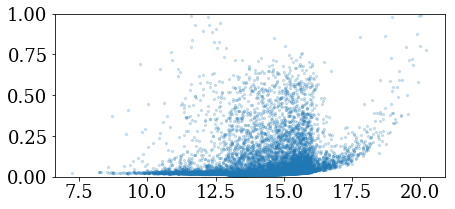

In [94]:
plt.figure(figsize=(7,3))
plt.scatter(df[ u'phot_g_mean_mag'],df[u'parallax_error'], s=5, alpha=.2)
plt.ylim(0,1)

In [96]:
ok = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (gaia[u'r_modality_flag'] == 1) & 
              (gaia[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01))[0]

ok.shape


(30305,)

## The Gaia-Kepler Rotation CMD

In [97]:
# let's put an ischrone down 

## Isochrones w/ Gaia mags
# output195874734622.dat # age = 1e8
# output783328222883.dat # age = 1e9
# output382961170123.dat # age = 5e9

isonames = ('Zini','Age','Mini','Mass','logL','logTe','logg','label','McoreTP',
            'C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo',
            'Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag','B_Tmag','V_Tmag',
            'Jmag','Hmag','Ksmag')

iso_file = '../iso/output783328222883.dat'
iso = pd.read_table(iso_file, delim_whitespace=True, header=None, comment='#', names=isonames)
iso1e8 = pd.read_table('../iso/output195874734622.dat', delim_whitespace=True, header=None, comment='#', names=isonames)
iso5e9 = pd.read_table('../iso/output382961170123.dat', delim_whitespace=True, header=None, comment='#', names=isonames)


isonames2 = ('Zini', 'Age', 'Mini', 'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 
             'C_O', 'period0', 'period1', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 
             'Xo', 'Cexcess', 'Z', 'mbolmag', 'Umag', 'Bmag', 'Vmag', 'Rmag', 'Imag', 'Jmag', 'Hmag', 'Kmag'
)
iso_file2 = '../iso/output632510793236.dat' # a 1e9 isochrone w/ UBVRIJHK mags
iso2 = pd.read_table(iso_file2, delim_whitespace=True, header=None, comment='#', names=isonames2)

# get just the main sequence, and reverse it (for interpolating later)
iok = np.where((iso['label'] < 2) & (iso['Gmag'] > 1.7))[0][::-1]

In [98]:
print(np.shape(iso), np.shape(iso2))

(456, 31) (456, 31)


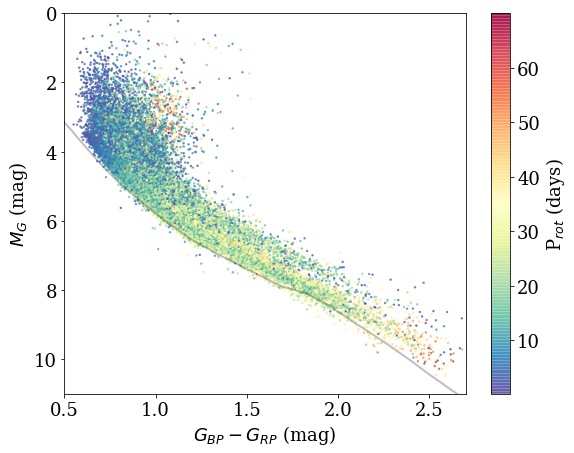

In [107]:
plt.figure(figsize=(9,7))
cm = plt.cm.get_cmap('Spectral_r')

plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
            c=(df[u'Prot'].values[ok]), alpha=0.7, s=2, cmap=cm)

plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], iso['Gmag'].values[iok], 
         c='k', lw=2, alpha=0.25)
# plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], iso['Gmag'].values[iok] - 0.7, c='k', lw=2, alpha=0.25)
# plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], iso['Gmag'].values[iok] - 1.3, c='k', lw=2, alpha=0.25)

plt.ylim(11,0)
plt.xlim(.5,2.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
# plt.title('Gaia DR2 - McQuillan (2014)')
# plt.text(4000, 1, 'N=894', fontsize=12)

cb = plt.colorbar()
cb.set_label('P$_{rot}$ (days)')

plt.savefig('../figures/cmd'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

In [108]:
print(np.shape(ok))

(30305,)


Now select things in a plausible main sequence region

In [109]:
Mg_iso = np.interp(df[u'bp_rp'].values[ok], iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], 
                   iso['Gmag'].values[iok])
delta_mag = Mg_iso - (df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5)


In [110]:
dok = np.isfinite(delta_mag)
delta_mag[dok]

dmag_lims = [[0.2, 0.6], [0.8, 1.3]]

In [111]:
# main sequence stars
msok = np.where((delta_mag >= dmag_lims[0][0]) & 
                (delta_mag <= dmag_lims[0][1]))[0]

# binary main sequence stars
bsok = np.where((delta_mag >= dmag_lims[1][0]) & 
                (delta_mag <= dmag_lims[1][1]))[0]

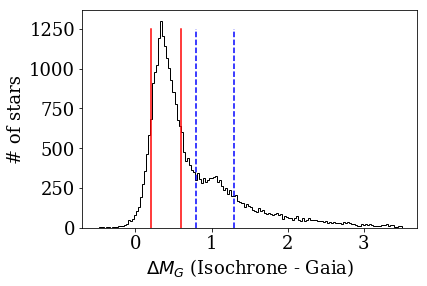

In [112]:
_ = plt.hist(delta_mag[dok], range=(-0.5,3.5), bins=150, histtype='step', lw=1, color='k')
plt.ylabel('# of stars')
plt.xlabel(r'$\Delta M_G$ (Isochrone - Gaia)')

plt.plot([dmag_lims[0][0],dmag_lims[0][0]], [0,1250], c='r')
plt.plot([dmag_lims[0][1],dmag_lims[0][1]], [0,1250], c='r')

plt.plot([dmag_lims[1][0],dmag_lims[1][0]], [0,1250], c='b', linestyle='--')
plt.plot([dmag_lims[1][1],dmag_lims[1][1]], [0,1250], c='b', linestyle='--')

## an oddity?
is there a gradient of rotation period across the main sequence? maybe binaries?

if so, we can get a sharper exploration of the bimodality by selecting only the "lower" bit...?

In [113]:
iso_grid_file = '../iso/output349228763560.dat'
inames = ('Zini','Age','Mini','Mass','logL','logTe','logg','label','McoreTP',
            'C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo',
            'Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag')
igrid = pd.read_table(iso_grid_file, delim_whitespace=True, header=None, comment='#', names=inames)

[  1.00000000e+08   1.26000000e+08   1.58000000e+08   2.00000000e+08
   2.51000000e+08   3.16000000e+08   3.98000000e+08   5.01000000e+08
   6.31000000e+08   7.94000000e+08   1.00000000e+09   1.26000000e+09
   1.58000000e+09   2.00000000e+09   2.51000000e+09   3.16000000e+09
   3.98000000e+09   5.01000000e+09   6.31000000e+09   7.94000000e+09]


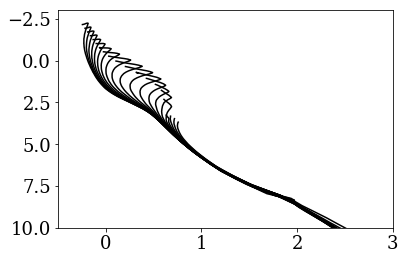

In [114]:
for aa in np.unique(igrid['Age']):
    aok = np.where((igrid['Age'] == aa) & (igrid['label'] < 2))

    plt.plot(igrid['G_BPmag'].values[aok] - igrid['G_RPmag'].values[aok], igrid['Gmag'].values[aok], c='k')
plt.ylim(10,-3)
plt.xlim(-.5,3)

print(np.unique(igrid['Age']))

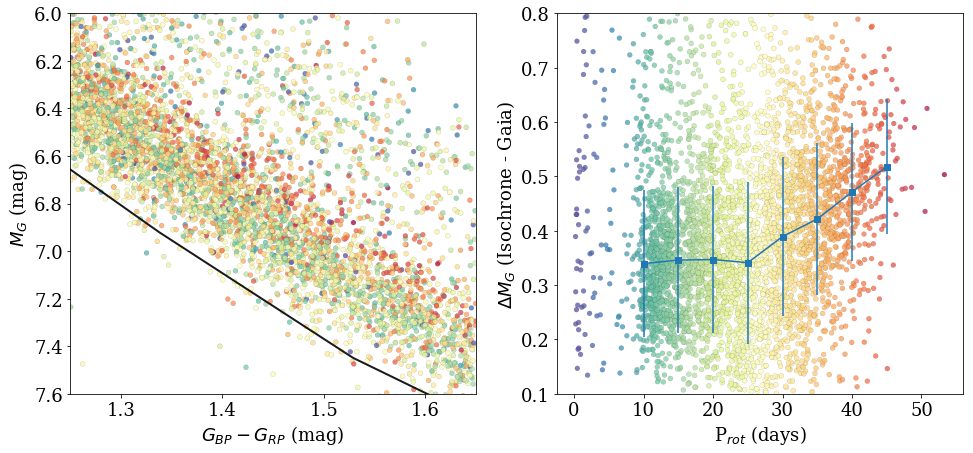

In [115]:
plt.figure(figsize=(16,7))
cm = plt.cm.get_cmap('Spectral_r')


crng = [1.25, 1.65]

# i forget what rb stands for.... but its stuff near the main sequence in a small range of color
rb_ok0 = np.where((df[u'bp_rp'].values[ok] > crng[0]) & (df[u'bp_rp'].values[ok] < crng[1]) & 
                  (df[u'Prot'].values[ok] < 50))[0]

plt.subplot(121)
#----e
plt.scatter(df[u'bp_rp'].values[ok][rb_ok0], 
            df[u'phot_g_mean_mag'].values[ok][rb_ok0] - 5. * np.log10(df[u'r_est'].values[ok][rb_ok0])  + 5, 
            c=(df[u'Prot'].values[ok][rb_ok0]), 
            alpha=0.75, s=25, cmap=cm, edgecolors='k', lw=0.1, rasterized=False)

plt.plot(iso5e9['G_BPmag'].values[iok] - iso5e9['G_RPmag'].values[iok], iso5e9['Gmag'].values[iok], 
         c='k', lw=2, alpha=0.9)

plt.ylim(7.6,6)
plt.xlim(crng[0], crng[1])
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')


#----
plt.subplot(122)
rb_ok = np.where((df[u'bp_rp'].values[ok] > crng[0]) & (df[u'bp_rp'].values[ok] < crng[1]) & 
                  (delta_mag > 0.1) & (delta_mag < 0.8))[0]

plt.scatter(df[u'Prot'].values[ok][rb_ok], delta_mag[rb_ok], c=(df[u'Prot'].values[ok][rb_ok]),
            s=25, alpha=0.75, cmap=cm, edgecolors='k', lw=0.1, rasterized=False)

dy = 5
yy = np.arange(10,50,dy)
xx = np.zeros_like(yy, dtype='float')
xxe = np.zeros_like(yy, dtype='float')
for k in range(len(yy)):
    xok = np.where((df[u'Prot'].values[ok][rb_ok] >= yy[k]-dy/2.) & (df[u'Prot'].values[ok][rb_ok] < (yy[k]+dy/2.)))
    xx[k] = np.nanmedian(delta_mag[rb_ok][xok])
    xxe[k] = np.nanstd(delta_mag[rb_ok][xok]) 

plt.errorbar(yy,xx, yerr=xxe, marker='s')

plt.ylim(0.1, 0.8)
plt.ylabel(r'$\Delta M_G$ (Isochrone - Gaia)')
plt.xlabel('P$_{rot}$ (days)')

plt.savefig('../figures/cmd_zoom'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

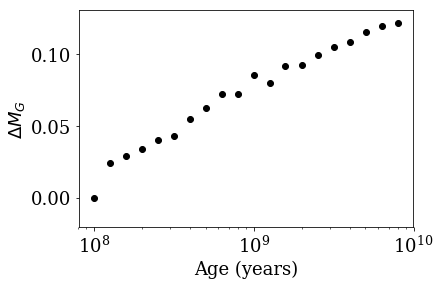

In [116]:
# how much change in mag do we expect from a grid of isochrones (not correcting for offsets)

newMg0 = 7.34344444 # found this manually the first time for the youngest age

color_point = (crng[0] + crng[1])/2.
for aa in np.unique(igrid['Age']):
    aok = np.where((igrid['Age'] == aa) & (igrid['label'] < 2) & 
                   (igrid['G_BPmag'].values - igrid['G_RPmag'].values >= crng[0]) & 
                   (igrid['G_BPmag'].values - igrid['G_RPmag'].values < crng[1]))[0][::-1]
    newMg = np.interp(color_point, igrid['G_BPmag'].values[aok] - 
                      igrid['G_RPmag'].values[aok], igrid['Gmag'].values[aok])
#     print(aa, newMg)
    plt.scatter(aa, newMg0 - newMg,
               c='k')
#     plt.plot(igrid['G_BPmag'].values[aok] - igrid['G_RPmag'].values[aok], igrid['Gmag'].values[aok], '-o', alpha=0.1)

plt.xscale('log')
plt.xlabel('Age (years)')
plt.ylabel(r'$\Delta M_G$ ')
plt.savefig('../figures/iso_age'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

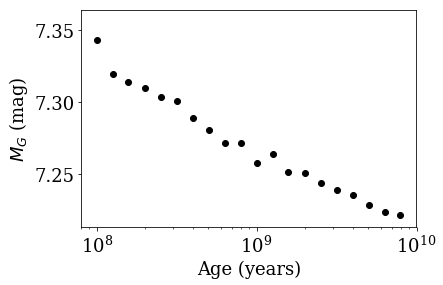

In [117]:
# how much change in mag do we expect from a grid of isochrones (not correcting for offsets)
color_point = (crng[0] + crng[1])/2.
for aa in np.unique(igrid['Age']):
    aok = np.where((igrid['Age'] == aa) & (igrid['label'] < 2) & 
                   (igrid['G_BPmag'].values - igrid['G_RPmag'].values >= crng[0]) & 
                   (igrid['G_BPmag'].values - igrid['G_RPmag'].values < crng[1]))[0][::-1]
    newMg = np.interp(color_point, igrid['G_BPmag'].values[aok] - 
                      igrid['G_RPmag'].values[aok], igrid['Gmag'].values[aok])
#     print(aa, newMg)
    plt.scatter(aa, newMg,
               c='k')
#     plt.plot(igrid['G_BPmag'].values[aok] - igrid['G_RPmag'].values[aok], igrid['Gmag'].values[aok], '-o', alpha=0.1)

plt.xscale('log')
plt.xlabel('Age (years)')
plt.ylabel(r'$M_G$ (mag)')
# plt.savefig('../figures/iso_age0'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

## The Color-Rotation Diagram
This is the meat of what we're after!

The period bimodality *is* there, and most notable for the red stars again.

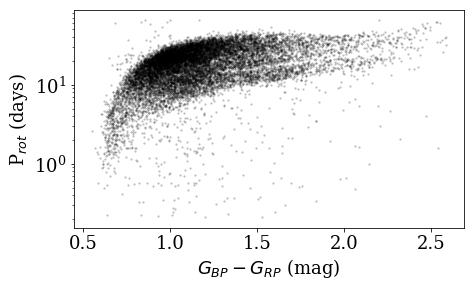

In [118]:
plt.figure(figsize=(7,4))
cm = plt.cm.get_cmap('Spectral')

plt.scatter(df[u'bp_rp'].values[ok][msok], df[u'Prot'].values[ok][msok], 
            s=5, alpha=0.25, c='k', lw=0)

plt.yscale('log')
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('P$_{rot}$ (days)');

In [23]:
# plt.figure(figsize=(7,4))
# cm = plt.cm.get_cmap('Spectral')

# plt.scatter(df[u'Teff'].values[ok][msok], df[u'Prot'].values[ok][msok], 
#             s=5, alpha=0.25, c='k', lw=0, rasterized=True)

# plt.yscale('log')
# plt.xlabel('Teff (K)')
# plt.xlim(6600,3000)
# plt.ylabel('P$_{rot}$ (days)')

In [24]:
# plt.figure(figsize=(7,4))
# cm = plt.cm.get_cmap('Spectral')

# plt.scatter(df[u'jmag'].values[ok][msok] - df[u'kmag'].values[ok][msok] , df[u'Prot'].values[ok][msok], 
#             s=5, alpha=0.25, c='k', lw=0, rasterized=True)

# plt.yscale('log')
# plt.xlabel('J-Ks')
# plt.xlim(0.15,1)
# plt.ylabel('P$_{rot}$ (days)')

## Slices in Distance
This is *messier* than with DR1, likely because we're not just limited to the nearest 300pc!

So do what I said I'd do in the DR1 paper... make cuts in distance

Text(0,0.5,'Number of Stars')

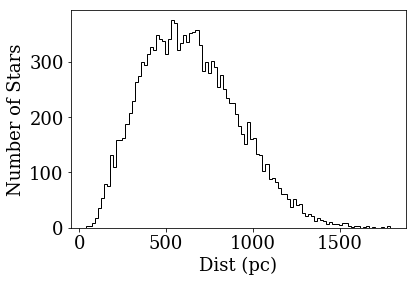

In [119]:
dist = df[u'r_est'].values[ok][msok]

_ = plt.hist(dist, histtype='step', color='k', bins=100)
plt.xlabel('Dist (pc)')
plt.ylabel('Number of Stars')

In [120]:
# dbins = np.array([0, 300, 450, 525, 600, 700, 800, 900, 1100, 3500])
dbins = np.array([0, 350, 525, 600, 900, 3500])


print(dbins)

for k in range(len(dbins)-1):
    print(sum((dist >= dbins[k]) & (dist < dbins[k+1])))

[   0  350  525  600  900 3500]
2097
3216
1498
5010
2568


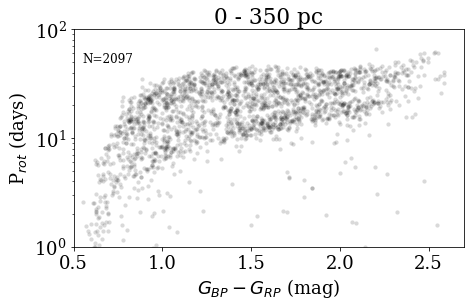

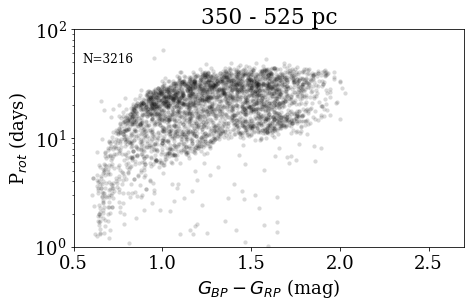

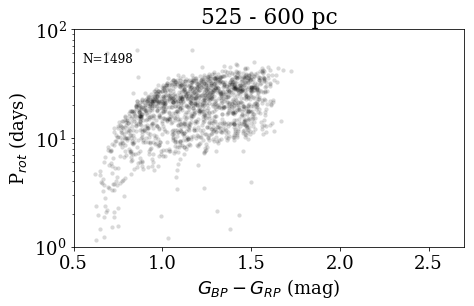

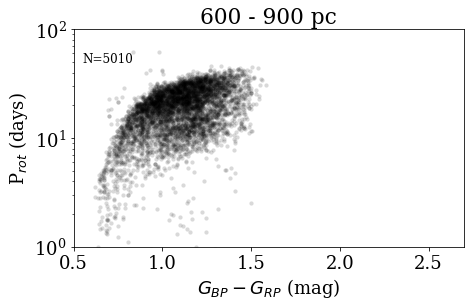

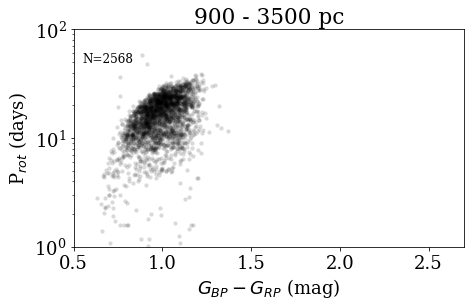

In [122]:
# dbins = np.array([0, 300, 450, 525, 600, 700, 800, 900, 1100, 3500])
dbins = np.array([0, 350, 525, 600, 900, 3500])

for k in range(len(dbins)-1):
    dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]))
    
    plt.figure(figsize=(7,4))
    plt.scatter(df[u'bp_rp'].values[ok][msok][dd], df[u'Prot'].values[ok][msok][dd], 
                s=18, alpha=0.15, c='k', lw=0, rasterized=False)
    
    plt.text(0.55,50, 'N='+str(np.size(dd)), fontsize=12)
    plt.yscale('log')
    plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
    plt.ylabel('P$_{rot}$ (days)');
    plt.xlim(0.5,2.7)
    plt.ylim(1,100)
    plt.title(str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc')
    plt.savefig('../figures/rot_dist_'+str(dbins[k]) + ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)
    plt.show()
    
    

Text(0.5,0,'P$_{rot}$ (days)')

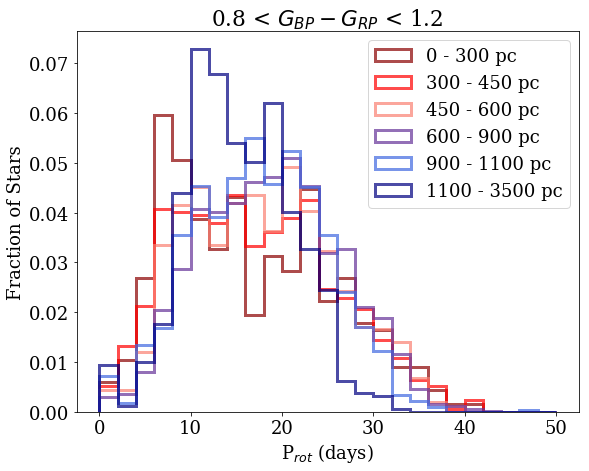

In [123]:
dbins = np.array([0, 300, 450, 600, 900, 1100, 3500])
clr = ['DarkRed', 'red', 'salmon', 'RebeccaPurple', 'RoyalBlue', 'Navy']

plt.figure(figsize=(9,7))

for k in range(0,len(dbins)-1,1):
    dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]) & 
                  (df[u'bp_rp'].values[ok][msok] >= .8) & (df[u'bp_rp'].values[ok][msok] <= 1.2))
    
    
    _ = plt.hist((df[u'Prot'].values[ok][msok][dd]), histtype='step', bins=25, range=(0,50),
                 label=str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc', 
                 normed=True, lw=3, alpha=0.7, color=clr[k])
plt.legend()
plt.title('0.8 < $G_{BP} - G_{RP}$ < 1.2')
plt.ylabel('Fraction of Stars')
plt.xlabel('P$_{rot}$ (days)')


Text(0.5,0,'P$_{rot}$ (days)')

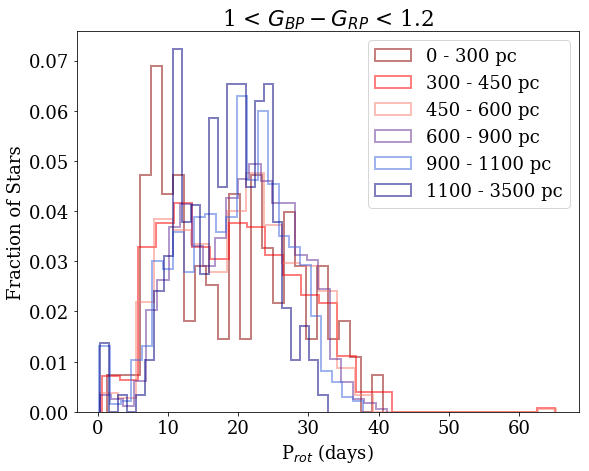

In [124]:
dbins = np.array([0, 300, 450, 600, 900, 1100, 3500])
clr = ['DarkRed', 'red', 'salmon', 'RebeccaPurple', 'RoyalBlue', 'Navy']

plt.figure(figsize=(9,7))

for k in range(0,len(dbins)-1,1):
    dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]) & 
                  (df[u'bp_rp'].values[ok][msok] >= 1) & (df[u'bp_rp'].values[ok][msok] <= 1.2))
    
    
    _ = plt.hist((df[u'Prot'].values[ok][msok][dd]), histtype='step', bins=25,
                 label=str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc', 
                 normed=True, lw=2, alpha=0.5, color=clr[k])
plt.legend()
plt.title('1 < $G_{BP} - G_{RP}$ < 1.2')
plt.ylabel('Fraction of Stars')
plt.xlabel('P$_{rot}$ (days)')



(0, 1500)

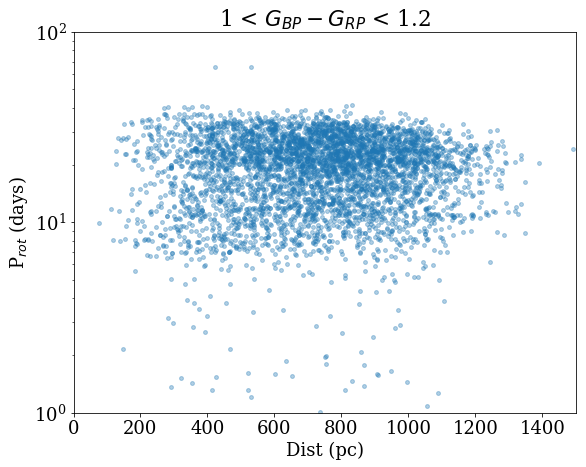

In [125]:
dd = np.where((df[u'bp_rp'].values[ok][msok] >= 1.) & (df[u'bp_rp'].values[ok][msok] <= 1.2))

plt.figure(figsize=(9,7))
plt.scatter(dist[dd], (df[u'Prot'].values[ok][msok][dd]), alpha=0.35, s=15)
plt.yscale('log')
plt.title('1 < $G_{BP} - G_{RP}$ < 1.2')
plt.ylabel('P$_{rot}$ (days)')
plt.xlabel('Dist (pc)')
plt.ylim(1,100)
plt.xlim(0,1500)



(0, 800)

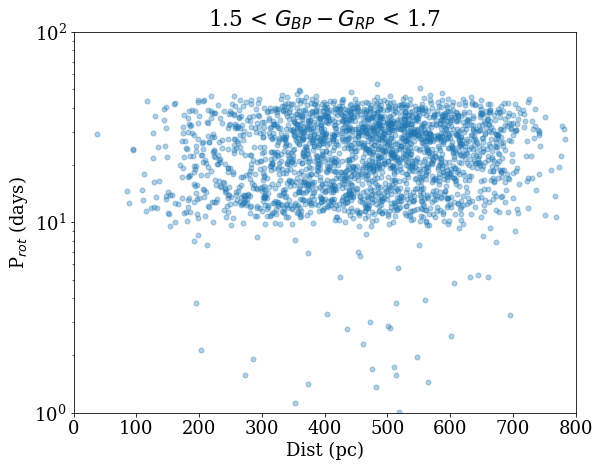

In [126]:
dd = np.where((df[u'bp_rp'].values[ok][msok] >= 1.35) & (df[u'bp_rp'].values[ok][msok] <= 1.7))

plt.figure(figsize=(9,7))
plt.scatter(dist[dd], (df[u'Prot'].values[ok][msok][dd]), alpha=0.35, s=25)
plt.yscale('log')
plt.title('1.5 < $G_{BP} - G_{RP}$ < 1.7')
plt.ylabel('P$_{rot}$ (days)')
plt.xlabel('Dist (pc)')
plt.ylim(1,100)
plt.xlim(0,800)


## Singles vs Binaries

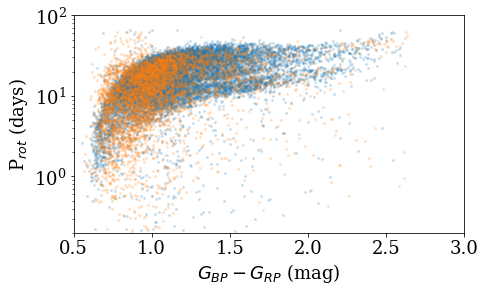

In [127]:
plt.figure(figsize=(7,4))
plt.scatter(df[u'bp_rp'].values[ok][msok], df[u'Prot'].values[ok][msok], 
            s=8, alpha=0.25, lw=0)
plt.scatter(df[u'bp_rp'].values[ok][bsok], df[u'Prot'].values[ok][bsok], 
            s=8, alpha=0.25, lw=0)

plt.yscale('log')
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('P$_{rot}$ (days)');
plt.xlim(0.5,3)
plt.ylim(0.2,100)
plt.show()

Text(0.5,1,'1 < $G_{BP} - G_{RP}$ < 1.2')

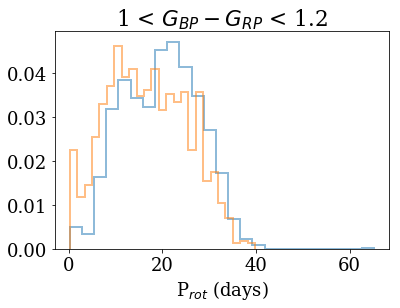

In [128]:
ms1 = np.where((df[u'bp_rp'].values[ok][msok] >= 1) & (df[u'bp_rp'].values[ok][msok] <= 1.2))
bs1 = np.where((df[u'bp_rp'].values[ok][bsok] >= 1) & (df[u'bp_rp'].values[ok][bsok] <= 1.2))

_ = plt.hist((df[u'Prot'].values[ok][msok][ms1]), histtype='step', bins=25,
             normed=True, lw=2, alpha=0.5)
_ = plt.hist((df[u'Prot'].values[ok][bsok][bs1]), histtype='step', bins=25,
             normed=True, lw=2, alpha=0.5)

plt.xlabel('P$_{rot}$ (days)');
plt.title('1 < $G_{BP} - G_{RP}$ < 1.2')


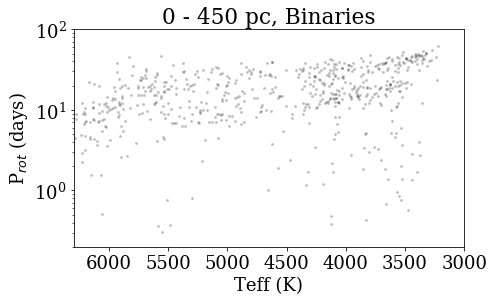

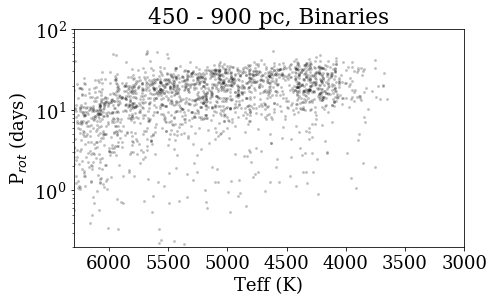

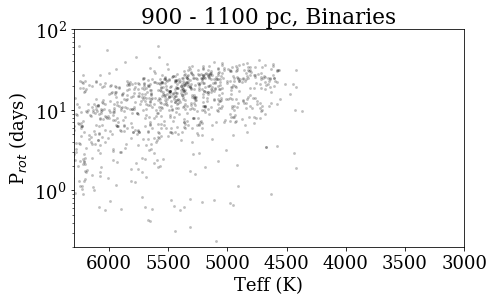

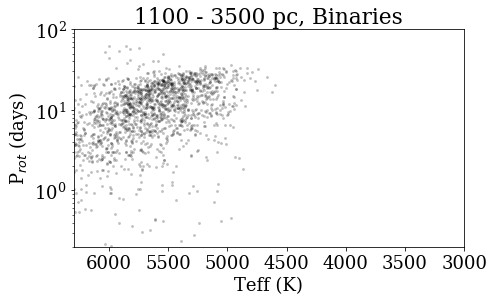

In [129]:
bdist = df[u'r_est'].values[ok][bsok]
bbins = np.array([0, 450, 900, 1100, 3500])


for k in range(len(bbins)-1):
    dd = np.where((bdist >= bbins[k]) & (bdist < bbins[k+1]))
    
    plt.figure(figsize=(7,4))
    plt.scatter(df[u'Teff'].values[ok][bsok][dd], df[u'Prot'].values[ok][bsok][dd], 
                s=8, alpha=0.25, c='k', lw=0)

    plt.yscale('log')
    plt.xlabel('Teff (K)')
    plt.ylabel('P$_{rot}$ (days)');
    plt.xlim(6300,3000)
    plt.ylim(0.2,100)
    plt.title(str(bbins[k]) + ' - ' + str(bbins[k+1]) + ' pc, Binaries')
    plt.show()

## total proper motion?
this was a set of figures from the original McQuillan+2013 paper that was interesting

Text(0.5,1,'Kepler Main Sequence Stars w/ Rotation')

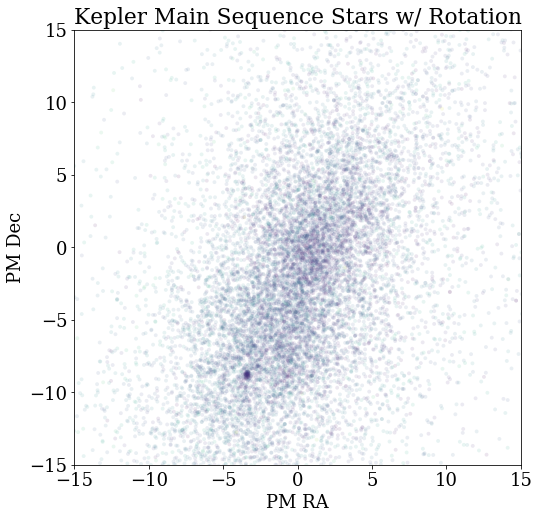

In [130]:
plt.figure(figsize=(8,8))
plt.scatter((df[u'pmra'].values[ok][msok]), (df[u'pmdec'].values[ok][msok]), 
            alpha=0.1, s=15, lw=0, c=df[u'Prot'].values[ok][msok])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('PM RA')
plt.ylabel('PM Dec')
plt.title('Kepler Main Sequence Stars w/ Rotation')


Text(0.5,1,'Kepler All Stars w/ Rotation')

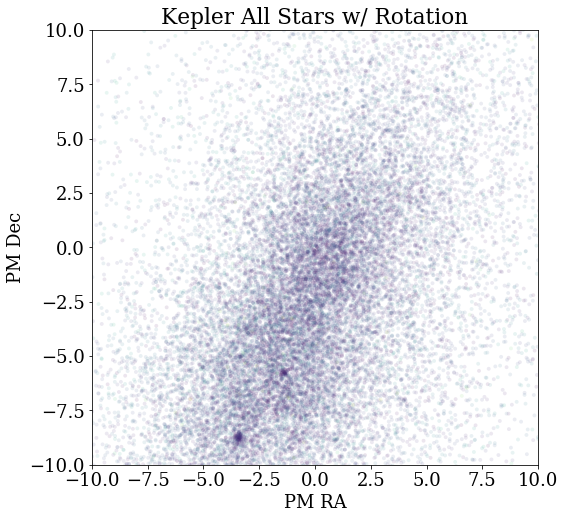

In [131]:
plt.figure(figsize=(8,8))
plt.scatter((df[u'pmra'].values[ok]), (df[u'pmdec'].values[ok]), 
            alpha=0.1, s=15, lw=0, c=df[u'Prot'].values[ok])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.xlabel('PM RA')
plt.ylabel('PM Dec')
plt.title('Kepler All Stars w/ Rotation')



(0, 80)

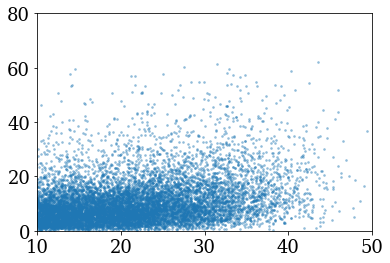

In [132]:
total_pm = np.sqrt((df[u'pmra'].values[ok][msok])**2 + (df[u'pmdec'].values[ok][msok])**2)

pmok = np.where((df[u'Teff'].values[ok][msok] > 4000))[0]

plt.scatter(df[u'Prot'].values[ok][msok][pmok], total_pm[pmok], alpha=0.35, s=3)
# plt.xscale('log')
plt.xlim(10,50)
plt.ylim(0,80)

## next steps...
as of 1030am, day1

The goal is (currently) to see how far in distance the period bimodality exists. 

A seconday goal is to see if there are other period (age) structures

Since the population of stars (GKM) changes vs distance due to apparent brightnes limits of Kepler, need to consider all stars togeather. THUS, we need to estimate an AGE for each star (enter the GRYOCHRONE!) and look at the age spread vs distance.

**Problem:** No gyrochrones are defined for the Gaia bands... YET

In [133]:
def MM09e2(B_V, age):
    ''' 
    Eqn 2 
    http://adsabs.harvard.edu/abs/2009ApJ...695..679M
    '''
    a = 0.50
    b = 0.15
    P = np.sqrt(age) * (np.sqrt(B_V - a)) - b * (B_V - a)
    return P

def MM09e3(B_V, age):
    ''' Eqn 3 '''
    c = 0.77
    d = 0.40
    f = 0.60
    P = age**0.52 * (c * (B_V - d)**f)
    return P

Text(0.5,1,'1e9yr isochrone')

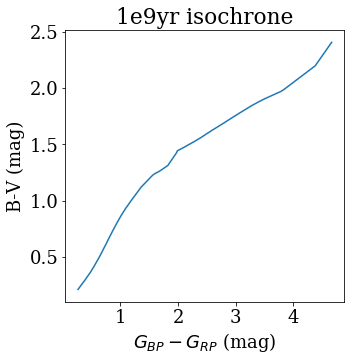

In [134]:
plt.figure(figsize=(5,5))
plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], 
         iso2['Bmag'].values[iok] - iso2['Vmag'].values[iok])
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('B-V (mag)')
plt.title('1e9yr isochrone')

In [135]:
# now convert these gyrochrones from B-V to GP-RP, or our data to B-V (via an isochrone)
BV_ms = np.interp(df[u'bp_rp'].values[ok], iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok],
                 iso2['Bmag'].values[iok] - iso2['Vmag'].values[iok])


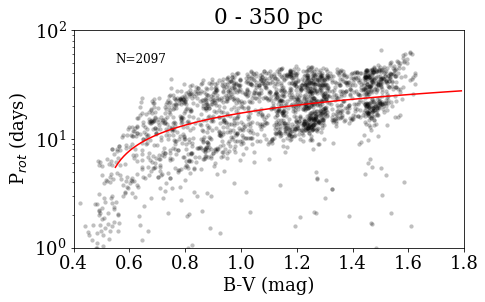

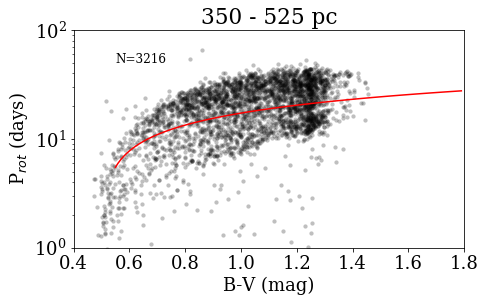

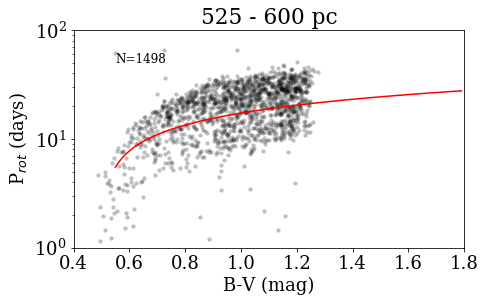

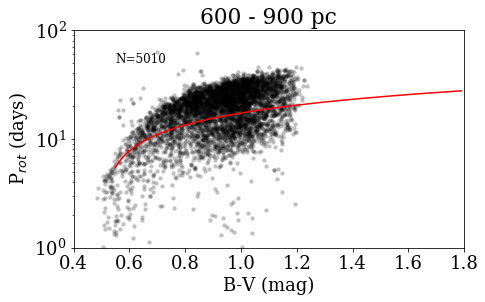

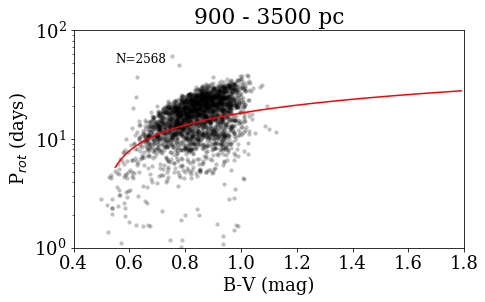

In [136]:
dbins = np.array([0, 350, 525, 600, 900, 3500])

for k in range(len(dbins)-1):
    dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]))
    
    plt.figure(figsize=(7,4))
    plt.scatter(BV_ms[msok][dd], df[u'Prot'].values[ok][msok][dd], 
                s=18, alpha=0.25, c='k', lw=0)
    
    B_V_iso = np.arange(0.55,1.8,0.01)

    P_iso2 = MM09e2(B_V_iso, 600)
    plt.plot(B_V_iso, P_iso2, c='red')

    plt.text(0.55,50, 'N='+str(np.size(dd)), fontsize=12)
    plt.yscale('log')
    plt.xlabel('B-V (mag)')
    plt.ylabel('P$_{rot}$ (days)');
    plt.xlim(0.4,1.8)
    plt.ylim(1,100)
    plt.title(str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc')
    plt.show()

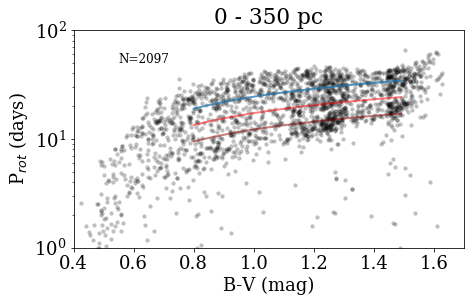

In [137]:
dbins = np.array([0, 350, 525, 600, 900, 3500])

k=0
dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]))

plt.figure(figsize=(7,4))
plt.scatter(BV_ms[msok][dd], df[u'Prot'].values[ok][msok][dd], 
            s=18, alpha=0.25, c='k', lw=0)

B_V_iso = np.arange(0.8,1.5,0.01)

P_iso1 = MM09e2(B_V_iso, 300)
P_iso2 = MM09e2(B_V_iso, 600)
P_iso3 = MM09e2(B_V_iso, 1200)
plt.plot(B_V_iso, P_iso1, c='DarkRed', lw=2, alpha=0.5)
plt.plot(B_V_iso, P_iso2, c='red', lw=2, alpha=0.5)
plt.plot(B_V_iso, P_iso3, lw=2, alpha=0.75)


plt.text(0.55,50, 'N='+str(np.size(dd)), fontsize=12)
plt.yscale('log')
plt.xlabel('B-V (mag)')
plt.ylabel('P$_{rot}$ (days)');
plt.xlim(0.4,1.7)
plt.ylim(1,100)
plt.title(str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc')
plt.savefig('../figures/B_V_rot' + ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

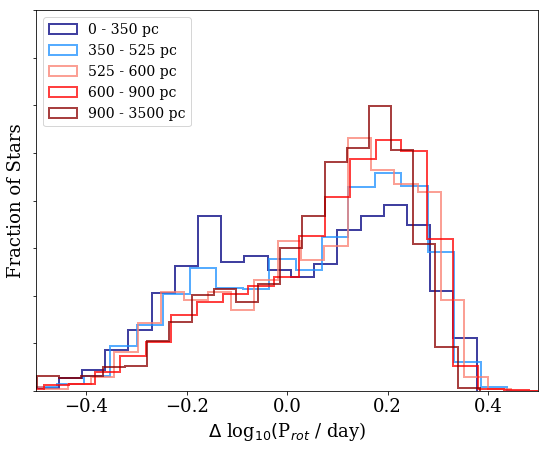

In [138]:
dbins = np.array([0, 350, 525, 600, 900, 3500])

clr = ['DarkRed', 'red', 'salmon', 'DodgerBlue', 'Navy']

fig=plt.figure(figsize=(9,7))
ax = plt.subplot(111)
for k in range(len(dbins)-1):
    # for a restricted range of color (0.7 < B-V < 1.5), subtract off 600Myr gyrochrone
    dd = np.where((dist >= dbins[k]) & (dist < dbins[k+1]) &
                  (BV_ms[msok] >= 0.8) &(BV_ms[msok] <= 1.5))
     
    B_V_iso = np.arange(0.55,1.8,0.01)
    P_iso = MM09e2(B_V_iso, 600)
    plt.plot(B_V_iso, P_iso, c='r')

    rs = np.argsort(P_iso)
    red_P = np.interp(BV_ms[msok][dd], B_V_iso[rs], P_iso[rs])

    _ = plt.hist(np.log10(df[u'Prot'].values[ok][msok][dd]) - np.log10(red_P),
                 histtype='step', bins=50, lw=2, alpha=0.75, color=clr[::-1][k], density=True,
                 label=str(dbins[k]) + ' - ' + str(dbins[k+1]) + ' pc')

plt.legend(fontsize=14, loc='upper left')
plt.xlim(-0.5,0.5)
plt.ylim(0,4)
plt.xlabel(r'$\Delta$ log$_{10} ($P$_{rot}$ / day)')
plt.ylabel('Fraction of Stars')
ax.set_yticklabels('')

plt.savefig('../figures/delta_per'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

In [139]:
# B_V_iso = np.arange(0.55,1.8,0.01)
# P_iso = MM09e2(B_V_iso, 600)

# rs = np.argsort(P_iso)
# red_P = np.interp(BV_ms[msok], B_V_iso[rs], P_iso[rs])


# plt.figure(figsize=(10,9))
# plt.scatter(df[u'ra_gaia'].values[ok][msok], df[u'dec_gaia'].values[ok][msok], 
#             c=np.log10(df[u'Prot'].values[ok][msok]) - np.log10(red_P), 
#             s=5, alpha=0.73)
# cb = plt.colorbar()
# cb.set_clim(-0.5, 0.5)


## Something about subgiants too?

Text(0.5,1,'1 < Gaia Bp-Rp < 1.1')

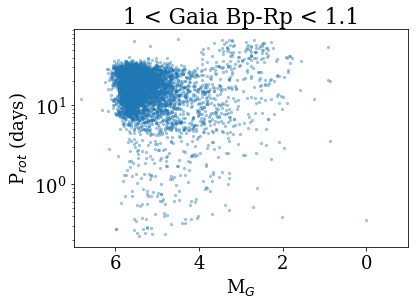

In [140]:
sg = np.where((df[u'bp_rp'].values[ok] >= 1) & (df[u'bp_rp'].values[ok] <= 1.1))

plt.scatter(df[u'phot_g_mean_mag'].values[ok][sg] - 5. * np.log10(df[u'r_est'].values[ok][sg])  + 5, 
            df[u'Prot'].values[ok][sg], alpha=0.35, s=5)
plt.xlim(7,-1)
plt.yscale('log')
plt.xlabel('M$_G$')
plt.ylabel('P$_{rot}$ (days)');
plt.title('1 < Gaia Bp-Rp < 1.1')

